<a href="https://colab.research.google.com/github/shubhsiro/udacity_tensorflow/blob/fashion_mnist_cnn_classification/Image_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#pip uninstall keras

In [2]:
#pip install keras --upgrade

In [29]:
from tensorflow.keras.datasets import fashion_mnist

import tensorflow as tf

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
import keras
import seaborn as sns

In [6]:
import logging
logger=tf.get_logger()
logger.setLevel(logging.ERROR)

### Import the Fashion MNIST dataset

In [7]:
(x_train,y_train),(x_test,y_test) = keras.datasets.fashion_mnist.load_data()

In [8]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [9]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

### First Image

In [10]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [11]:
class_labels=["tshirt/top","Trouser","Pullover","Dress","Coat","Sandal","shirt","sneaker","bag","ankle boot"]

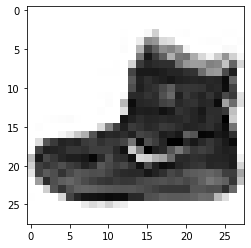

In [12]:
plt.imshow(x_train[0],cmap="Greys")

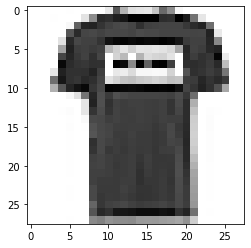

In [13]:
plt.imshow(x_train[1],cmap="Greys")

In [14]:
y_train[1]

0

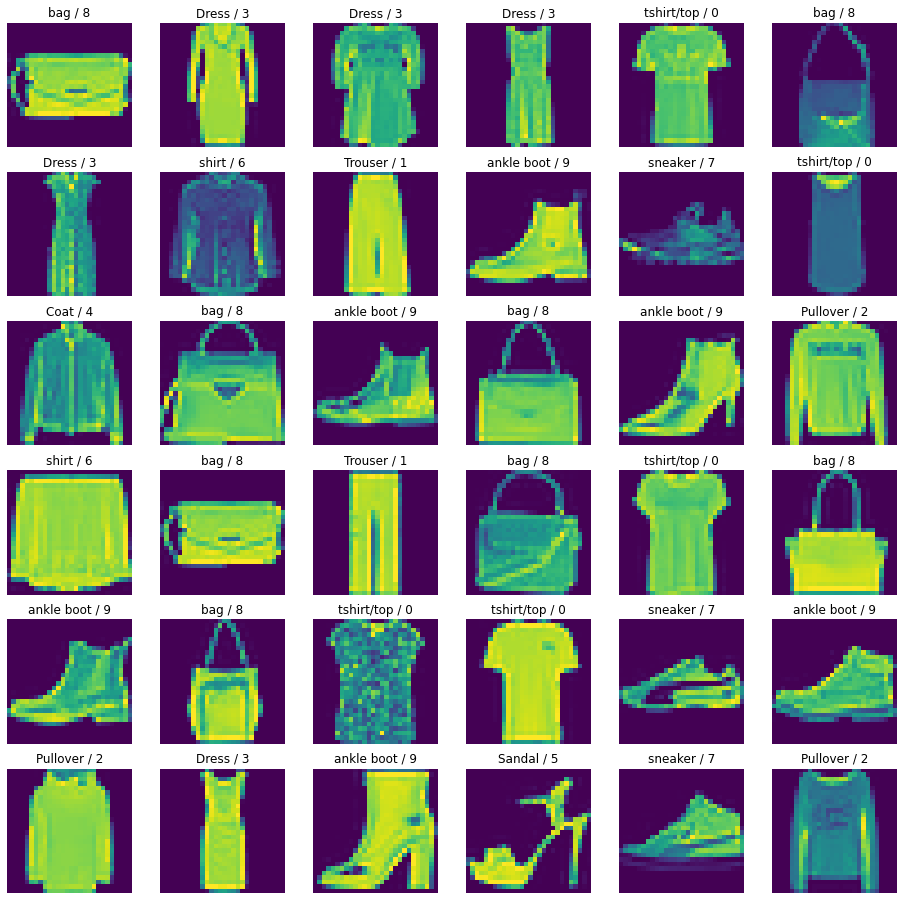

In [15]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,36):
  plt.subplot(6,6,j); j+=1
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

### Change Dimension

In [16]:
  x_train.ndim

3

In [17]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [18]:
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

In [19]:
x_train.ndim

4

In [20]:
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### Feature Scaling

In [21]:
x_train = x_train/255
x_test = x_test/255

In [22]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

### Split Data

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=2020)

In [24]:
x_train.shape ,y_train.shape

((48000, 28, 28, 1), (48000,))

In [25]:
x_val.shape, y_val.shape

((12000, 28, 28, 1), (12000,))

## Convolutional Neural network - Model Building

In [34]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

In [35]:
model=Sequential()

In [36]:
model.add(Conv2D(filters=32, kernel_size=3,strides=(1,1), padding='valid',activation='relu',input_shape=[28,28,1]))
model.add(MaxPooling2D(pool_size=(2,2)))

##model.add(Conv2D(filters=32, kernel_size=3,strides=(1,1), padding='valid',activation='relu',input_shape=[28,28,1]))
##model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
model.fit(x_train, y_train, epochs=10,batch_size=512,verbose=1,validation_data=(x_val,y_val))

Epoch 1/10
94/94 [==============================] - 31s 20ms/step - loss: 0.9383 - accuracy: 0.6916 - val_loss: 0.4168 - val_accuracy: 0.8568
Epoch 2/10
94/94 [==============================] - 1s 16ms/step - loss: 0.3908 - accuracy: 0.8626 - val_loss: 0.3570 - val_accuracy: 0.8758
Epoch 3/10
94/94 [==============================] - 1s 16ms/step - loss: 0.3297 - accuracy: 0.8826 - val_loss: 0.3283 - val_accuracy: 0.8862
Epoch 4/10
94/94 [==============================] - 1s 16ms/step - loss: 0.3084 - accuracy: 0.8906 - val_loss: 0.3107 - val_accuracy: 0.8924
Epoch 5/10
94/94 [==============================] - 1s 16ms/step - loss: 0.2735 - accuracy: 0.9038 - val_loss: 0.2934 - val_accuracy: 0.8982
Epoch 6/10
94/94 [==============================] - 1s 16ms/step - loss: 0.2634 - accuracy: 0.9063 - val_loss: 0.2887 - val_accuracy: 0.8988
Epoch 7/10
94/94 [==============================] - 1s 16ms/step - loss: 0.2419 - accuracy: 0.9135 - val_loss: 0.2803 - val_accuracy: 0.9029
Epoch 8/10
9

## Testing Model

In [42]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2748 - accuracy: 0.9012


[0.27478474378585815, 0.901199996471405]

In [44]:
model.predict(np.expand_dims(x_test[0],axis=0)).round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98]],
      dtype=float32)

In [45]:
np.argmax(model.predict(np.expand_dims(x_test[0],axis=0)).round(2))

9

In [46]:
y_test[0]

9

In [58]:
y_pred=model.predict((x_test)).round(2)
y_pred

array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.18, 0.02, 0.01]], dtype=float32)

## Visualize Output

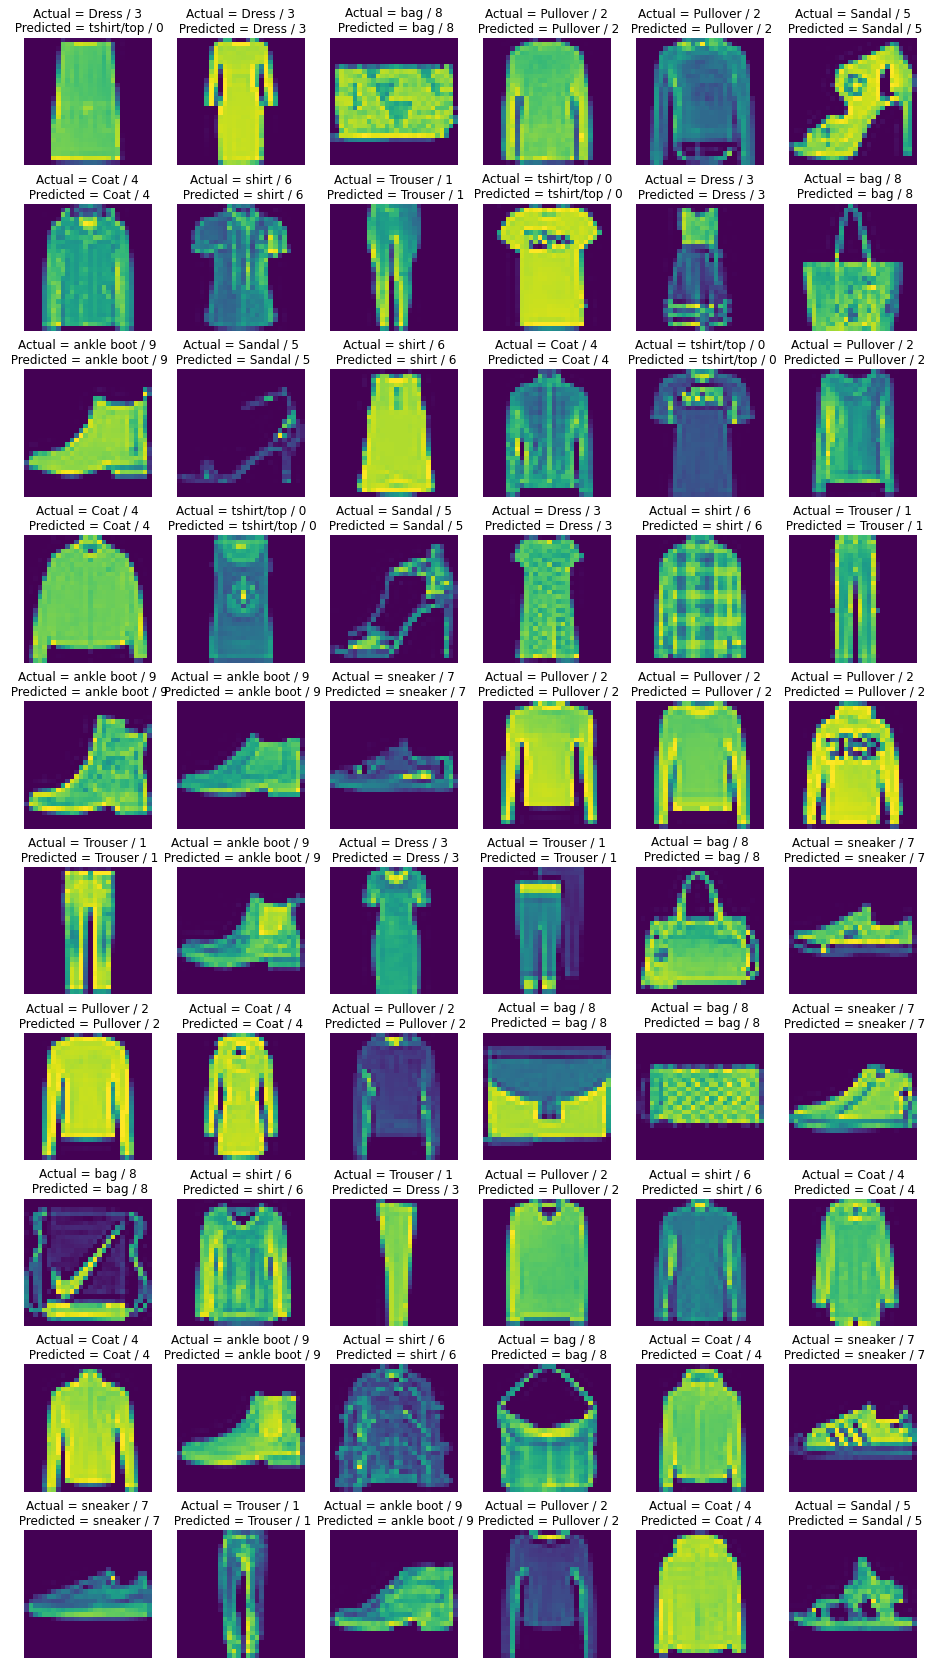

In [54]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j); j+=1
  plt.imshow(x_test[i].reshape(28,28))
  plt.title('Actual = {} / {}\n Predicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

## Report

In [60]:
from sklearn.metrics import classification_report
y_pred_labels=[np.argmax(label) for label in y_pred ]
cr=classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

  tshirt/top       0.82      0.89      0.85      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.83      0.84      0.84      1000
       Dress       0.90      0.91      0.91      1000
        Coat       0.80      0.89      0.84      1000
      Sandal       0.96      0.98      0.97      1000
       shirt       0.79      0.64      0.71      1000
     sneaker       0.95      0.96      0.95      1000
         bag       0.98      0.97      0.98      1000
  ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

